In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv

# Data import
----

In [2]:
injector_history = pd.read_excel('INJECTOR_HISTORY.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
meter_history = pd.read_excel('METER_HISTORY.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
order_recipe1 = pd.read_excel('ORDER_RECIPE1.xls')

In [5]:
order_recipe2 = pd.read_excel('ORDER_RECIPE2.xls')

In [6]:
order_recipe3 = pd.read_excel('ORDER_RECIPE3.xls')

In [7]:
order_recipe4 = pd.read_excel('ORDER_RECIPE4.xls')

In [8]:
order_recipe5 = pd.read_excel('ORDER_RECIPE5.xls')

In [9]:
order_recipe6 = pd.read_excel('ORDER_RECIPE6.xls')

In [10]:
order_recipe7 = pd.read_excel('ORDER_RECIPE7.xls')

In [11]:
order_recipe8 = pd.read_excel('ORDER_RECIPE8.xls')

In [12]:
orders = pd.read_excel('Orders.xls')

In [13]:
orders2 = pd.read_excel('Orders2.xls')

# Columns to keep
----

In [14]:
columns_to_keep_injector_history = ['INJECTOR_CODE','FOLIO_NUMBER','UNACCOUNTED','FRAC_UNACCOUNTED','PRODUCT_THRUPUT']

In [15]:
# Keep specific columns
injector_history = injector_history[columns_to_keep_injector_history]

In [16]:
columns_to_keep_meter_history = ['METER_CODE','FOLIO_NUMBER','NET_UNACCOUNTED','GROSS_UNACCOUNTED','GROSS_THRUPUT','NET_THRUPUT','ACTUAL_GROSS_THRUPUT']

In [17]:
# Keep specific columns
meter_history = meter_history[columns_to_keep_meter_history]

In [18]:
columns_to_keep_order_recipe1 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [19]:
# Keep specific columns
order_recipe1 = order_recipe1[columns_to_keep_order_recipe1]

In [20]:
columns_to_keep_order_recipe2 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [21]:
# Keep specific columns
order_recipe2 = order_recipe2[columns_to_keep_order_recipe2]

In [22]:
columns_to_keep_order_recipe3 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [23]:
# Keep specific columns
order_recipe3 = order_recipe3[columns_to_keep_order_recipe3]

In [24]:
columns_to_keep_order_recipe4 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [25]:
# Keep specific columns
order_recipe4 = order_recipe4[columns_to_keep_order_recipe4]

In [26]:
columns_to_keep_order_recipe5 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [27]:
# Keep specific columns
order_recipe5 = order_recipe5[columns_to_keep_order_recipe5]

In [28]:
columns_to_keep_order_recipe6 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [29]:
# Keep specific columns
order_recipe6 = order_recipe6[columns_to_keep_order_recipe6]

In [30]:
columns_to_keep_order_recipe7 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [31]:
# Keep specific columns
order_recipe7 = order_recipe7[columns_to_keep_order_recipe7]

In [32]:
columns_to_keep_order_recipe8 = ['ORDER_ID','INJECTOR_CODE','METER_CODE','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY']

In [33]:
# Keep specific columns
order_recipe8 = order_recipe8[columns_to_keep_order_recipe8]

In [34]:
columns_to_keep_orders = ['ORDER_ID','FOLIO_NUMBER']

In [35]:
orders = orders[columns_to_keep_orders]

In [36]:
columns_to_keep_orders2 = ['ORDER_ID','FOLIO_NUMBER']

In [37]:
orders2 = orders2[columns_to_keep_orders]

In [38]:
# Concatenate the DataFrames together
order_recipe = pd.concat([order_recipe1, order_recipe2, order_recipe3, order_recipe4, order_recipe5, order_recipe6, order_recipe7, order_recipe8], ignore_index=True)

order_recipe

,ORDER_ID,INJECTOR_CODE,METER_CODE,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY
0,8320,NaN,NaN,100,99
1,8320,NaN,NaN,100,99
2,8320,NaN,NaN,100,99
3,8320,NaN,MTR_301,671,665
4,8320,NaN,NaN,100,99
...,...,...,...,...,...
498060,3099018,INJ_402,NaN,300,300
498061,3099018,NaN,NaN,2000,1972
498062,3099018,NaN,NaN,200,200
498063,3099018,NaN,NaN,6000,5917


In [39]:
orders = pd.concat([orders, orders2], ignore_index=True)

orders

,ORDER_ID,FOLIO_NUMBER
0,8320,20210927.0
1,12128,20210928.0
2,19110,20210928.0
3,19143,20210928.0
4,19176,20210927.0
...,...,...
70201,3098862,20230719.0
70202,3098887,20230719.0
70203,3099018,NaN
70204,3099210,NaN


# Data Cleaning

In [40]:
Orders_merged = pd.merge(order_recipe, orders, on="ORDER_ID", how="inner")
Orders_merged

,ORDER_ID,INJECTOR_CODE,METER_CODE,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY,FOLIO_NUMBER
0,8320,NaN,NaN,100,99,20210927.0
1,8320,NaN,NaN,100,99,20210927.0
2,8320,NaN,NaN,100,99,20210927.0
3,8320,NaN,MTR_301,671,665,20210927.0
4,8320,NaN,NaN,100,99,20210927.0
...,...,...,...,...,...,...
498060,3099018,INJ_402,NaN,300,300,NaN
498061,3099018,NaN,NaN,2000,1972,NaN
498062,3099018,NaN,NaN,200,200,NaN
498063,3099018,NaN,NaN,6000,5917,NaN


In [41]:
Orders_merged.to_excel("Orders_merged.xlsx", index=False)

In [42]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [43]:
missing_percentage(Orders_merged)

,Total,Percent
INJECTOR_CODE,392913,78.89
METER_CODE,128970,25.89
FOLIO_NUMBER,41,0.01
ORDER_ID,0,0.00
ORDERED_QUANTITY,0,0.00
COMMITTED_NET_QUANTITY,0,0.00


In [44]:
Orders_merged.dropna(subset=['FOLIO_NUMBER'], inplace=True)

In [45]:
Orders_merged.dropna(subset=['INJECTOR_CODE', 'METER_CODE'], how='all', inplace=True)

In [46]:
missing_percentage(Orders_merged)

,Total,Percent
INJECTOR_CODE,369082,77.83
METER_CODE,105148,22.17
ORDER_ID,0,0.00
ORDERED_QUANTITY,0,0.00
COMMITTED_NET_QUANTITY,0,0.00
FOLIO_NUMBER,0,0.00


In [47]:
Orders_merged

,ORDER_ID,INJECTOR_CODE,METER_CODE,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY,FOLIO_NUMBER
3,8320,NaN,MTR_301,671,665,20210927.0
14,19110,NaN,MTR_501,10000,9916,20210928.0
15,19110,NaN,MTR_501,2000,1983,20210928.0
18,19110,NaN,MTR_503,10000,9916,20210928.0
19,19143,NaN,MTR_201,11000,10908,20210928.0
...,...,...,...,...,...,...
498048,3098887,NaN,MTR_501,8000,7886,20230719.0
498049,3098887,NaN,MTR_501,6000,5914,20230719.0
498050,3098887,NaN,MTR_503,5000,4929,20230719.0
498051,3098887,NaN,MTR_502,4000,3931,20230719.0


In [48]:
Orders_merged

,ORDER_ID,INJECTOR_CODE,METER_CODE,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY,FOLIO_NUMBER
3,8320,NaN,MTR_301,671,665,20210927.0
14,19110,NaN,MTR_501,10000,9916,20210928.0
15,19110,NaN,MTR_501,2000,1983,20210928.0
18,19110,NaN,MTR_503,10000,9916,20210928.0
19,19143,NaN,MTR_201,11000,10908,20210928.0
...,...,...,...,...,...,...
498048,3098887,NaN,MTR_501,8000,7886,20230719.0
498049,3098887,NaN,MTR_501,6000,5914,20230719.0
498050,3098887,NaN,MTR_503,5000,4929,20230719.0
498051,3098887,NaN,MTR_502,4000,3931,20230719.0


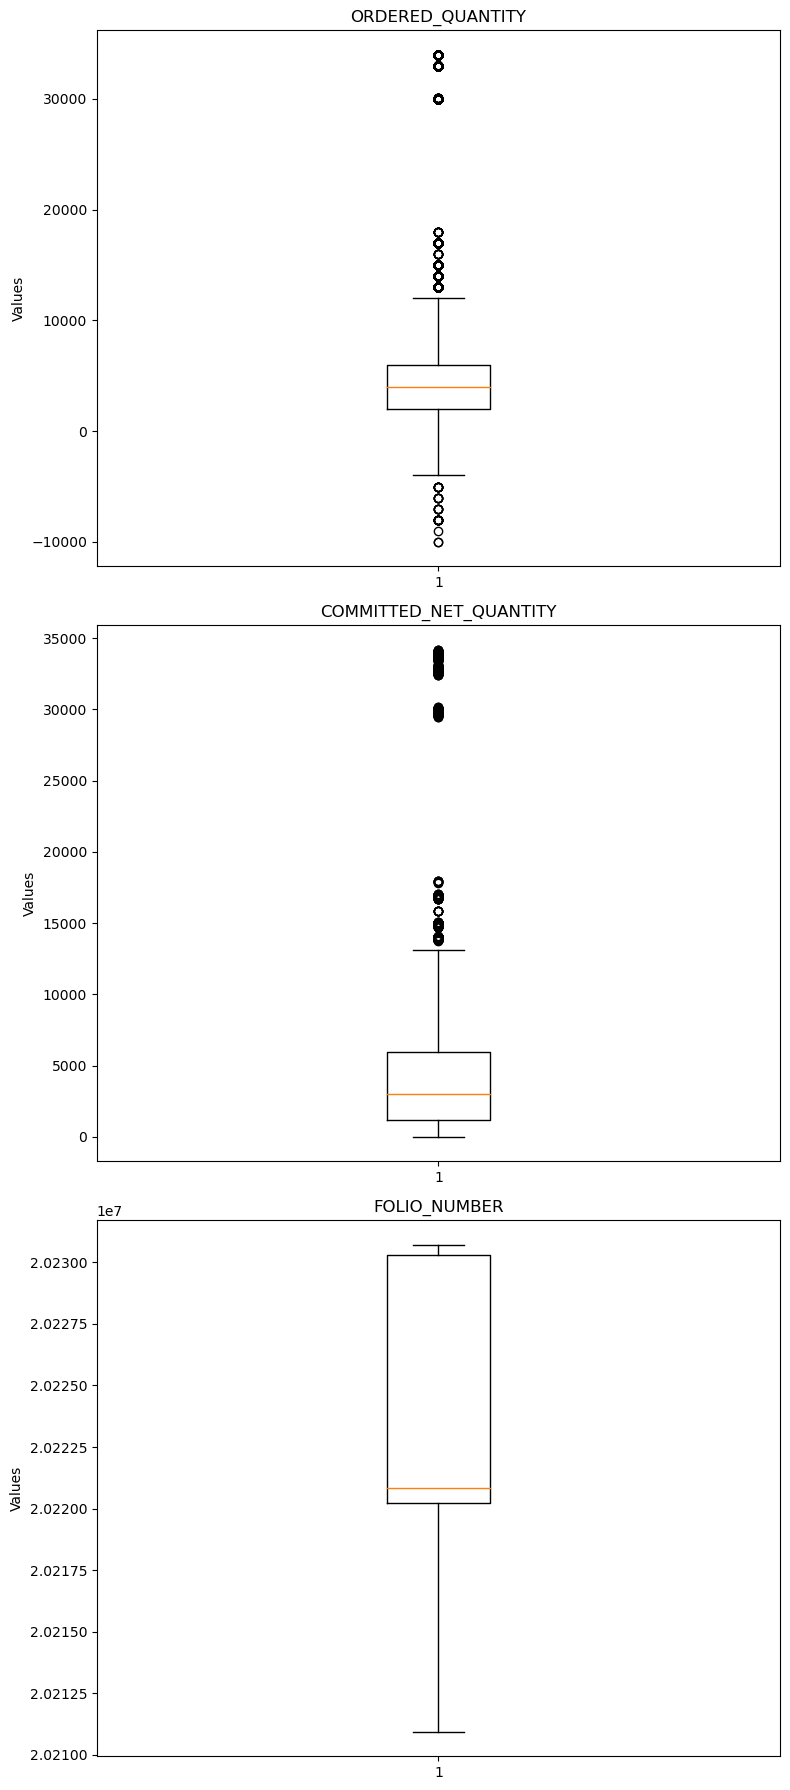

In [49]:
columns_for_boxplot = ['ORDERED_QUANTITY', 'COMMITTED_NET_QUANTITY', 'FOLIO_NUMBER']

fig, axs = plt.subplots(nrows=len(columns_for_boxplot), figsize=(8, 6 * len(columns_for_boxplot)))

for i, column in enumerate(columns_for_boxplot):
    axs[i].boxplot(Orders_merged[column])  # Creating the box plot
    axs[i].set_title(column)  # Set the title for each subplot
    axs[i].set_ylabel('Values')  # Set the y-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

In [50]:
columns_for_boxplot = ['ORDERED_QUANTITY', 'COMMITTED_NET_QUANTITY', 'FOLIO_NUMBER']

# Compute summary statistics for each column
summary = Orders_merged[columns_for_boxplot].describe()

# Print the summary statistics
print("Summary Statistics for Box Plots:")
print(summary)

Summary Statistics for Box Plots:
       ORDERED_QUANTITY  COMMITTED_NET_QUANTITY  FOLIO_NUMBER
count     474230.000000           474230.000000  4.742300e+05
mean        4525.019644             4064.097301  2.022230e+07
std         3441.473712             3494.726846  6.547740e+03
min       -10000.000000                0.000000  2.021093e+07
25%         2000.000000             1200.000000  2.022022e+07
50%         4000.000000             3017.000000  2.022082e+07
75%         6000.000000             5978.000000  2.023030e+07
max        34000.000000            34193.000000  2.023072e+07


In [51]:
unique_quantity = Orders_merged['ORDERED_QUANTITY'].unique()

In [52]:
unique_quantity

array([   671,  10000,   2000,  11000,   4000,   3000,   8000,   6000,
         9000,    800,    600,   5000,    500,   7000,    700,    400,
         1000,   1875,   1800,   1500,   2250,    300,   1200,   1125,
          900,   2400,    100,  14000,   4200,   2700,  34000,  15000,
        17000,  12000,   1750,    750,    450,   1250,    200,   2100,
         3600,  13000,  33000,  16000,   2500,  30000,     30,   3750,
         1450,   2625,    150,    170,     10,  10520,   4950,  33080,
        30060,      0,  18000,  30070,  10910,   7924,    125,  30080,
         7620,   9333,   3989,   6905,   8688,    164,    490,   9500,
         5993,   5291,   1050,    328,    740,    220,   6318,   9319,
           38,    212,   5188,   7041,   5032,   6993,   8771,    186,
         1853,    368,   6500,    650,   1465,    120,   6922,   1929,
         6882,   8679,   6325,   8095,    210,   7135,   8084,   7114,
         8094,   6923,   2897,   7906,    791,  11790,   7400,   3300,
      

In [53]:
Orders_merged.head()

,ORDER_ID,INJECTOR_CODE,METER_CODE,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY,FOLIO_NUMBER
3,8320,NaN,MTR_301,671,665,20210927.0
14,19110,NaN,MTR_501,10000,9916,20210928.0
15,19110,NaN,MTR_501,2000,1983,20210928.0
18,19110,NaN,MTR_503,10000,9916,20210928.0
19,19143,NaN,MTR_201,11000,10908,20210928.0


In [ ]:
Orders_merged.to_excel("Orders_merged2.xlsx", index=False)

In [55]:
meter_history

,METER_CODE,FOLIO_NUMBER,NET_UNACCOUNTED,GROSS_UNACCOUNTED,GROSS_THRUPUT,NET_THRUPUT,ACTUAL_GROSS_THRUPUT
0,MTR_201,20210927,7925,7998,337871,334744,345869
1,MTR_201,20210928,13878,13995,448730,444600,462725
2,MTR_201,20210929,-2,4,530971,526088,530975
3,MTR_201,20210930,-1,1,563237,557445,563238
4,MTR_201,20211001,-1,3,299805,296762,299808
...,...,...,...,...,...,...,...
16341,MTR_503,20231114,0,0,0,0,0
16342,MTR_503,20231115,0,0,0,0,0
16343,MTR_503,20231116,0,0,0,0,0
16344,MTR_503,20231117,0,0,0,0,0


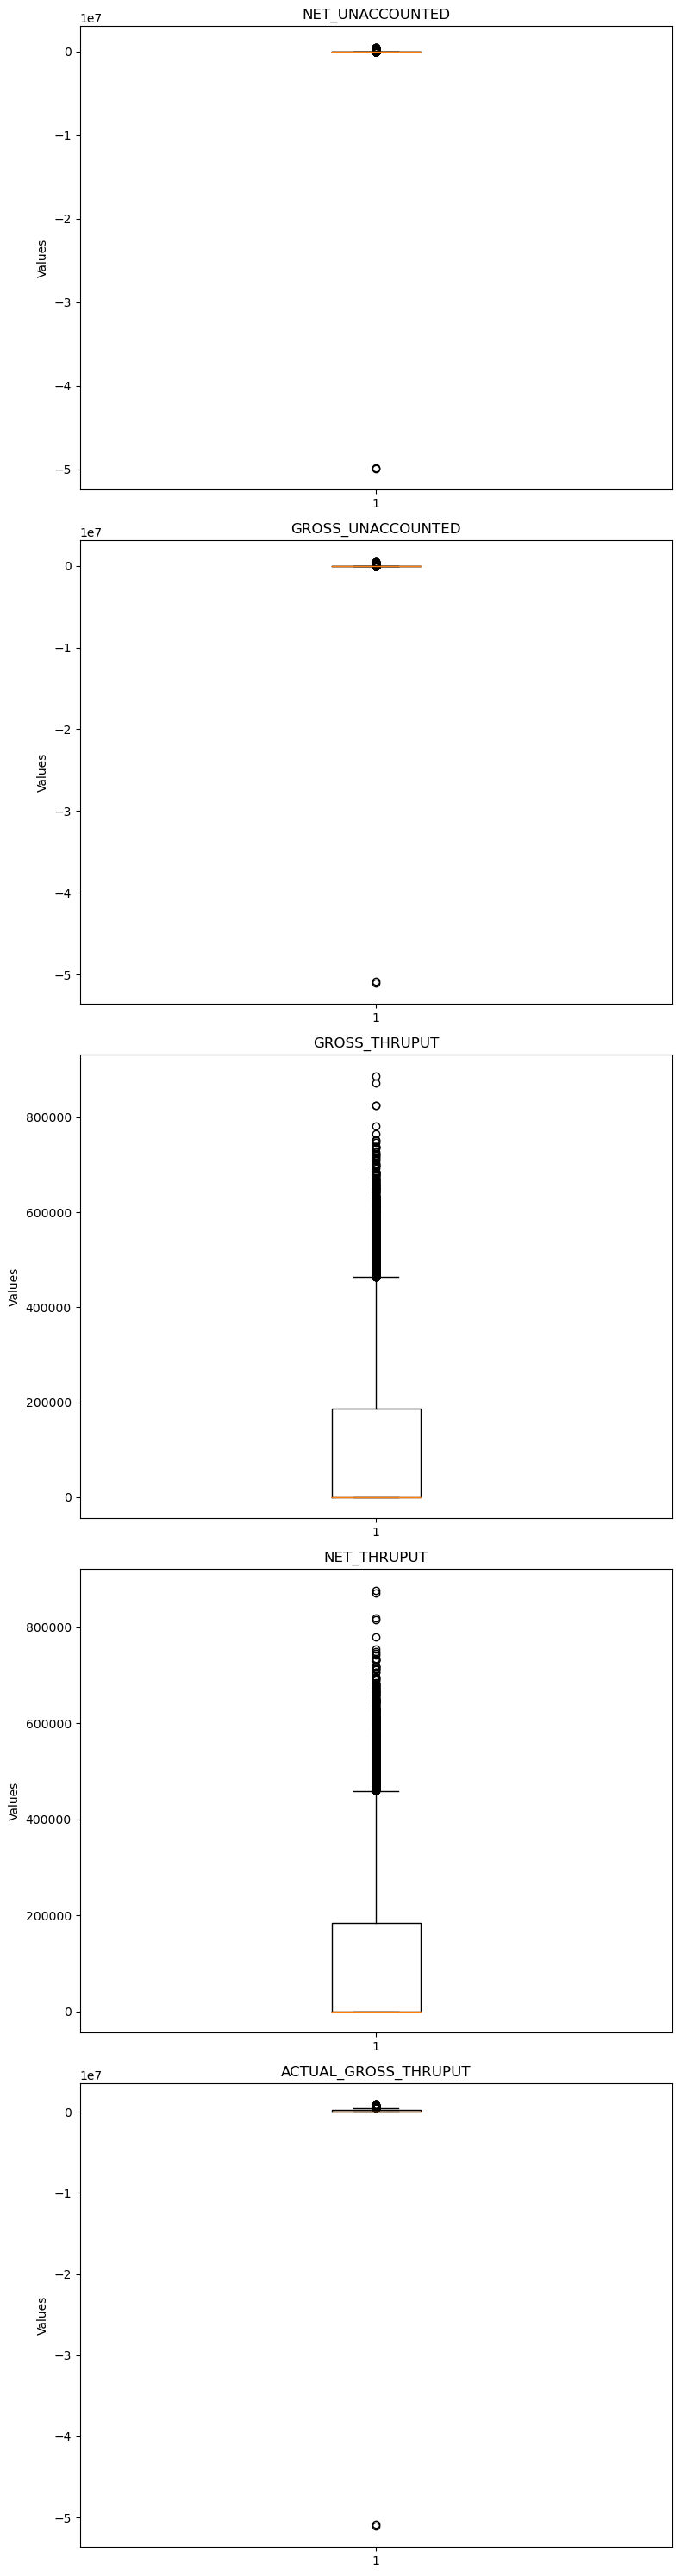

In [56]:
columns_for_boxplot = ['NET_UNACCOUNTED', 'GROSS_UNACCOUNTED', 'GROSS_THRUPUT','NET_THRUPUT','ACTUAL_GROSS_THRUPUT']

fig, axs = plt.subplots(nrows=len(columns_for_boxplot), figsize=(8, 6* len(columns_for_boxplot)))

for i, column in enumerate(columns_for_boxplot):
    axs[i].boxplot(meter_history[column])  # Creating the box plot
    axs[i].set_title(column)  # Set the title for each subplot
    axs[i].set_ylabel('Values')  # Set the y-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

In [57]:
meter_history.max()

METER_CODE               MTR_503
FOLIO_NUMBER            20231118
NET_UNACCOUNTED           502764
GROSS_UNACCOUNTED         508631
GROSS_THRUPUT             887245
NET_THRUPUT               876800
ACTUAL_GROSS_THRUPUT      887249
dtype: object

In [58]:
meter_history.min()

METER_CODE                MTR_201
FOLIO_NUMBER             20210927
NET_UNACCOUNTED         -49891858
GROSS_UNACCOUNTED       -51020369
GROSS_THRUPUT                   0
NET_THRUPUT                     0
ACTUAL_GROSS_THRUPUT    -51020369
dtype: object

In [59]:
desired_row = meter_history[meter_history['GROSS_UNACCOUNTED'] == -51020369]
print(desired_row)

      METER_CODE  FOLIO_NUMBER  NET_UNACCOUNTED  GROSS_UNACCOUNTED  \
10933    MTR_302      20230313        -49891858          -51020369   

       GROSS_THRUPUT  NET_THRUPUT  ACTUAL_GROSS_THRUPUT  
10933              0            0             -51020369  


In [60]:
meter_history = meter_history[meter_history['GROSS_UNACCOUNTED'] != -51020369]
meter_history = meter_history[meter_history['GROSS_UNACCOUNTED'] != -50852704]

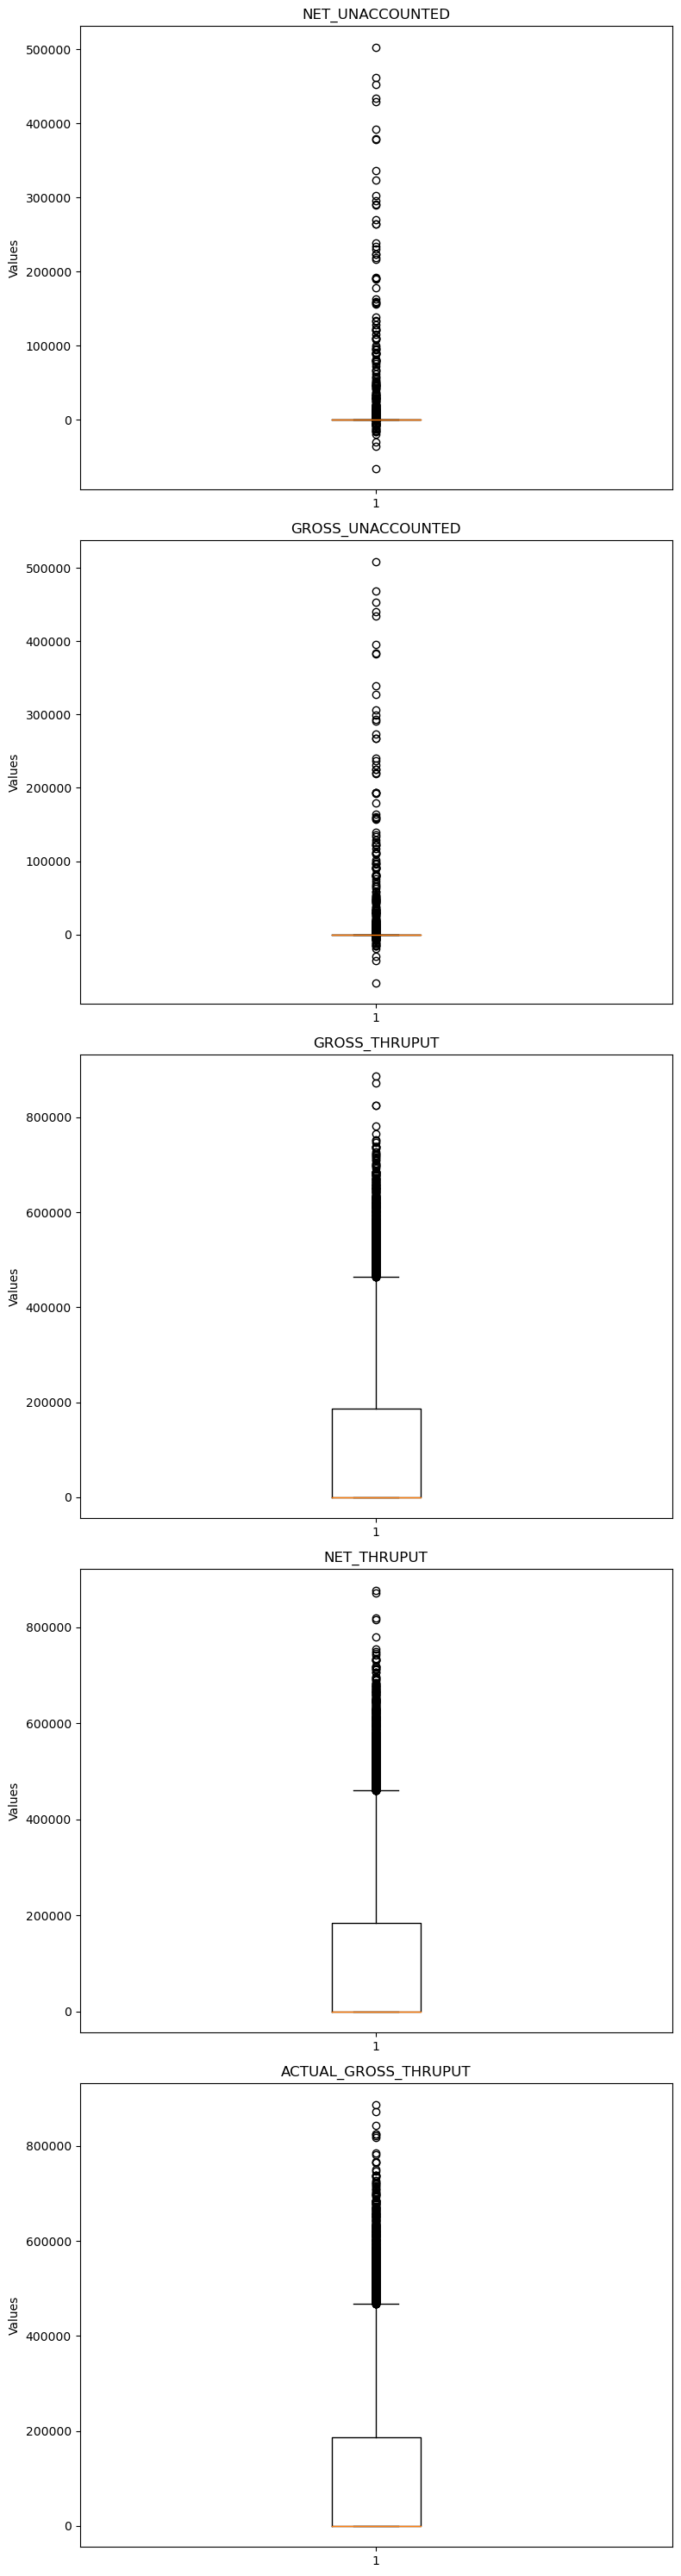

In [61]:
columns_for_boxplot = ['NET_UNACCOUNTED', 'GROSS_UNACCOUNTED', 'GROSS_THRUPUT','NET_THRUPUT','ACTUAL_GROSS_THRUPUT']

fig, axs = plt.subplots(nrows=len(columns_for_boxplot), figsize=(8, 6 * len(columns_for_boxplot)))

for i, column in enumerate(columns_for_boxplot):
    axs[i].boxplot(meter_history[column])  
    axs[i].set_title(column)  
    axs[i].set_ylabel('Values')

plt.tight_layout()  
plt.show() 

In [62]:
summary = meter_history.describe()
print(summary)

       FOLIO_NUMBER  NET_UNACCOUNTED  GROSS_UNACCOUNTED  GROSS_THRUPUT  \
count  1.634400e+04     16344.000000       16344.000000   16344.000000   
mean   2.022320e+07       946.039953         954.319077  113310.761013   
std    6.536839e+03     14349.558331       14481.966546  172434.564004   
min    2.021093e+07    -65457.000000      -65973.000000       0.000000   
25%    2.022033e+07         0.000000           0.000000       0.000000   
50%    2.022100e+07         0.000000           0.000000       0.000000   
75%    2.023041e+07         2.000000           2.000000  185697.750000   
max    2.023112e+07    502764.000000      508631.000000  887245.000000   

         NET_THRUPUT  ACTUAL_GROSS_THRUPUT  
count   16344.000000          16344.000000  
mean   112625.539709         114265.080091  
std    171386.044304         173463.471944  
min         0.000000              0.000000  
25%         0.000000              0.000000  
50%         0.000000              0.000000  
75%    183842.7500

In [63]:
injector_history

,INJECTOR_CODE,FOLIO_NUMBER,UNACCOUNTED,FRAC_UNACCOUNTED,PRODUCT_THRUPUT
0,INJ_201,20210927,0,-1,25990
1,INJ_201,20210928,0,-1,33973
2,INJ_201,20210929,0,1,78211
3,INJ_201,20210930,0,0,53963
4,INJ_201,20211001,0,-1,83864
...,...,...,...,...,...
26743,INJ_509,20231114,0,0,0
26744,INJ_509,20231115,0,0,0
26745,INJ_509,20231116,0,0,0
26746,INJ_509,20231117,0,0,0


In [64]:
summary = injector_history.describe()
print(summary)

       FOLIO_NUMBER   UNACCOUNTED  FRAC_UNACCOUNTED  PRODUCT_THRUPUT
count  2.674800e+04  2.674800e+04      26748.000000     26748.000000
mean   2.022320e+07  4.486303e+04         18.381673     18072.349409
std    6.536828e+03  1.413875e+07        109.649328     33126.622709
min    2.021093e+07 -7.598533e+08       -904.000000         0.000000
25%    2.022033e+07  0.000000e+00          0.000000         0.000000
50%    2.022100e+07  0.000000e+00          0.000000         0.000000
75%    2.023041e+07  0.000000e+00          0.000000     19969.000000
max    2.023112e+07  8.598525e+08        999.000000    269857.000000


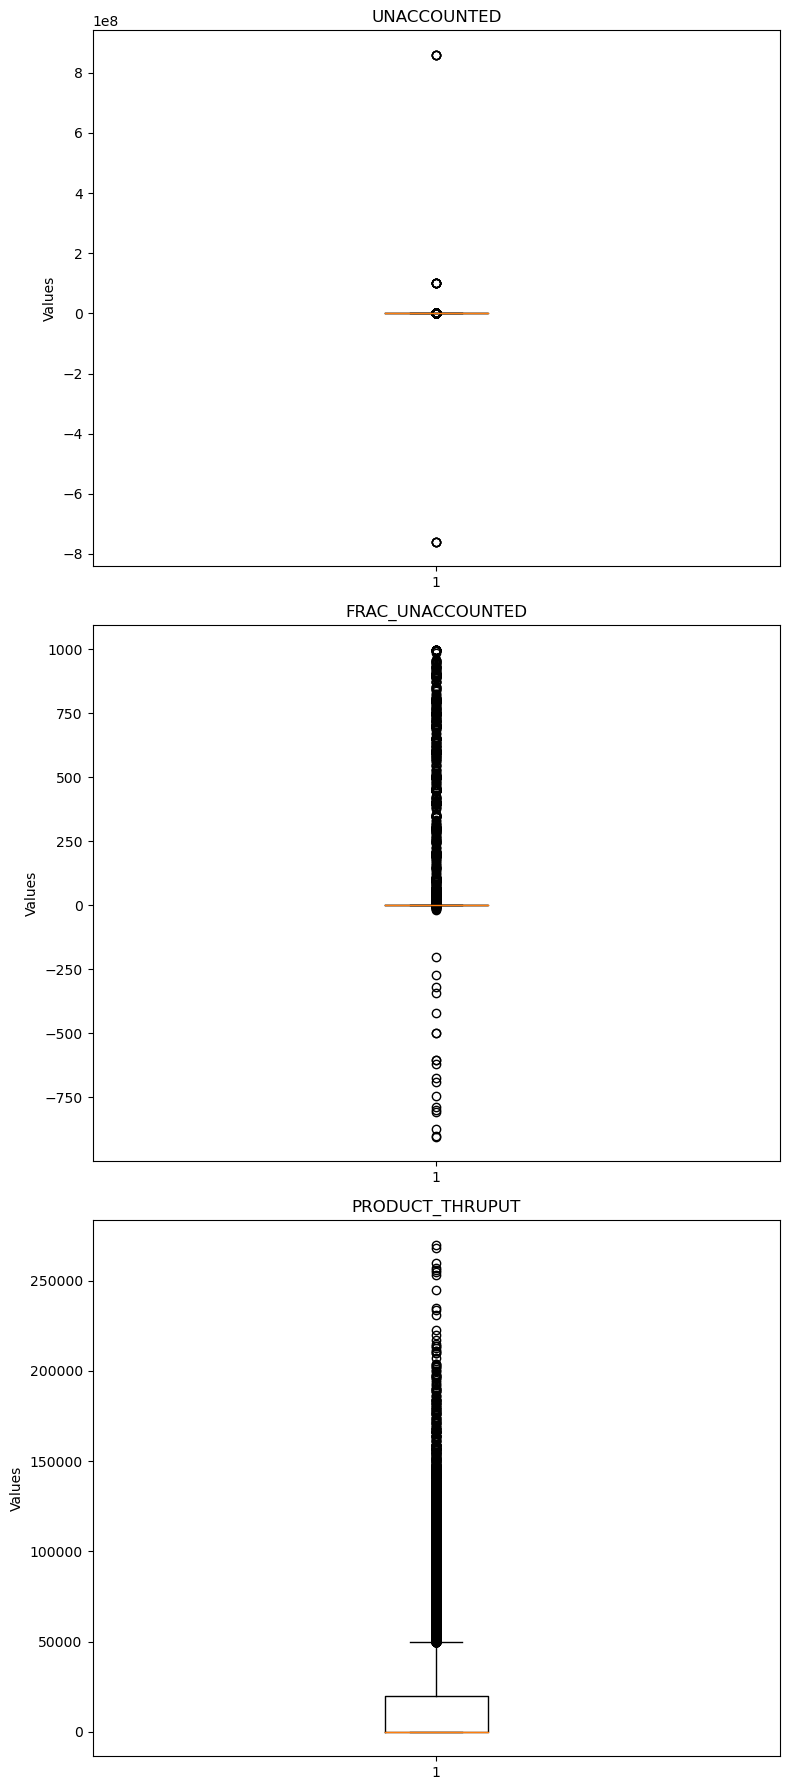

In [65]:
columns_for_boxplot = [  'UNACCOUNTED', 'FRAC_UNACCOUNTED','PRODUCT_THRUPUT']

fig, axs = plt.subplots(nrows=len(columns_for_boxplot), figsize=(8, 6 * len(columns_for_boxplot)))

for i, column in enumerate(columns_for_boxplot):
    axs[i].boxplot(injector_history[column])  
    axs[i].set_title(column)  
    axs[i].set_ylabel('Values')

plt.tight_layout()  
plt.show() 

In [66]:
injector_history.min()

INJECTOR_CODE          INJ_201
FOLIO_NUMBER          20210927
UNACCOUNTED         -759853316
FRAC_UNACCOUNTED          -904
PRODUCT_THRUPUT              0
dtype: object

In [67]:
injector_history.max()

INJECTOR_CODE         INJ_509
FOLIO_NUMBER         20231118
UNACCOUNTED         859852453
FRAC_UNACCOUNTED          999
PRODUCT_THRUPUT        269857
dtype: object

In [68]:
injector_history = injector_history[(injector_history['UNACCOUNTED'] >= -6*1e8) & (injector_history['UNACCOUNTED'] <= 0.5*1e8)]


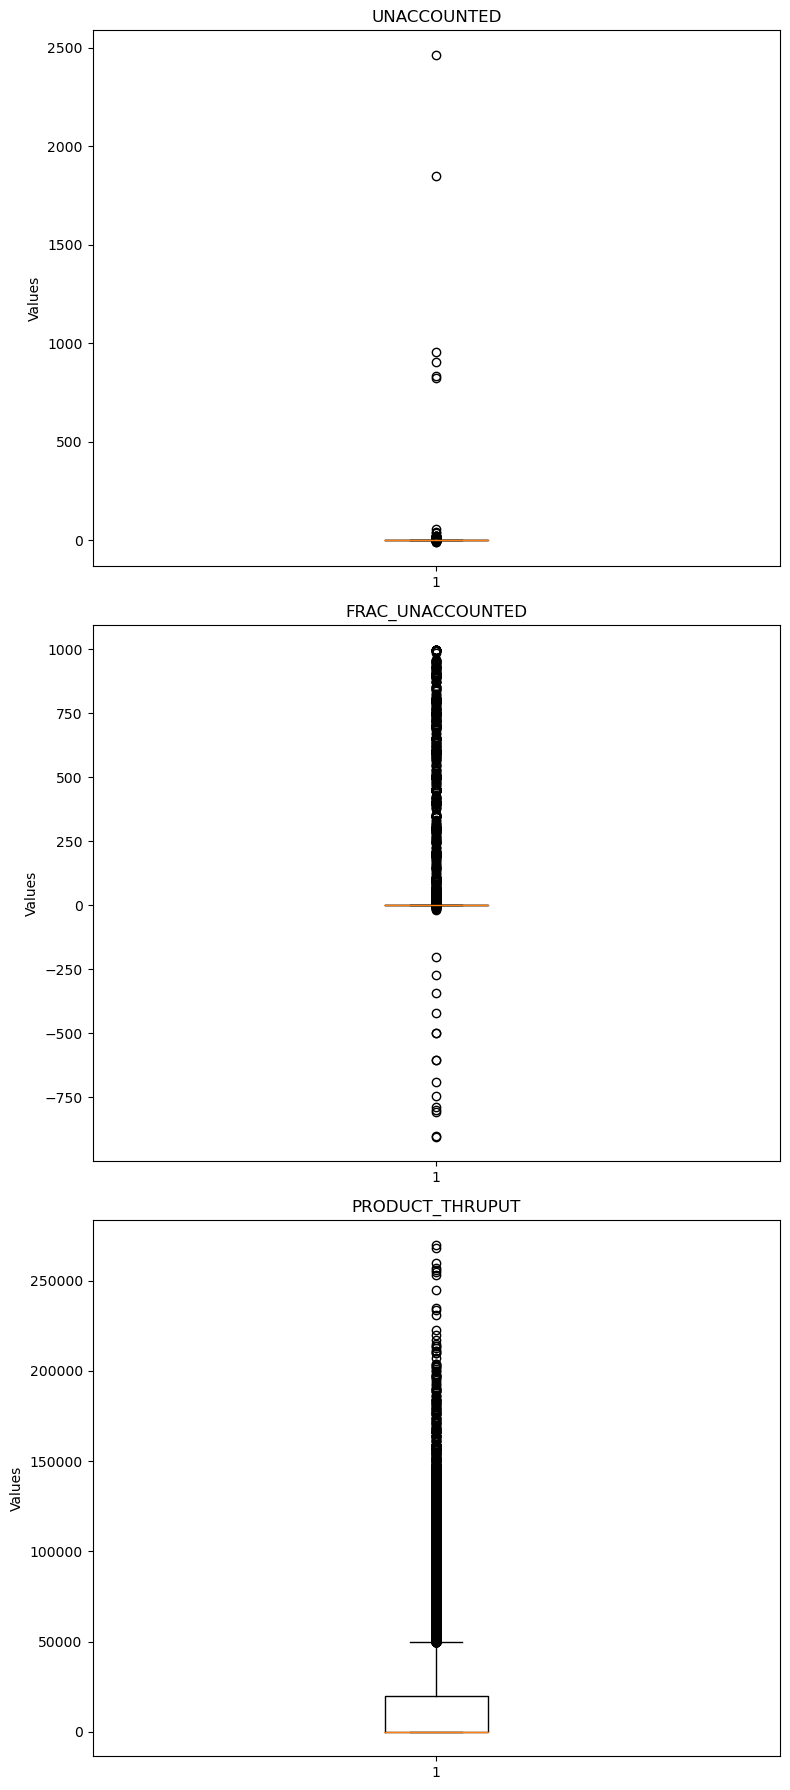

In [69]:
columns_for_boxplot = [  'UNACCOUNTED', 'FRAC_UNACCOUNTED','PRODUCT_THRUPUT']

fig, axs = plt.subplots(nrows=len(columns_for_boxplot), figsize=(8, 6 * len(columns_for_boxplot)))

for i, column in enumerate(columns_for_boxplot):
    axs[i].boxplot(injector_history[column])  
    axs[i].set_title(column)  
    axs[i].set_ylabel('Values')

plt.tight_layout()  
plt.show() 

In [70]:
injector_history

,INJECTOR_CODE,FOLIO_NUMBER,UNACCOUNTED,FRAC_UNACCOUNTED,PRODUCT_THRUPUT
0,INJ_201,20210927,0,-1,25990
1,INJ_201,20210928,0,-1,33973
2,INJ_201,20210929,0,1,78211
3,INJ_201,20210930,0,0,53963
4,INJ_201,20211001,0,-1,83864
...,...,...,...,...,...
26743,INJ_509,20231114,0,0,0
26744,INJ_509,20231115,0,0,0
26745,INJ_509,20231116,0,0,0
26746,INJ_509,20231117,0,0,0


In [71]:
summary = injector_history.describe()
print(summary)

       FOLIO_NUMBER   UNACCOUNTED  FRAC_UNACCOUNTED  PRODUCT_THRUPUT
count  2.673200e+04  26732.000000      26732.000000     26732.000000
mean   2.022320e+07      0.394546         18.229725     18082.228116
std    6.537023e+03     21.721195        108.649481     33134.004796
min    2.021093e+07     -8.000000       -904.000000         0.000000
25%    2.022033e+07      0.000000          0.000000         0.000000
50%    2.022100e+07      0.000000          0.000000         0.000000
75%    2.023041e+07      0.000000          0.000000     19974.000000
max    2.023112e+07   2464.000000        999.000000    269857.000000


In [72]:
def sum_ordered_quantity(injector_code, folio_number, dataset):
    # Filter the dataset based on the provided injector code and folio number
    filtered_data = dataset[(dataset['INJECTOR_CODE'] == injector_code) & (dataset['FOLIO_NUMBER'] == folio_number)]
    
    # Calculate the sum of the ordered quantities
    total_quantity = filtered_data['ORDERED_QUANTITY'].sum()
    
    return total_quantity


In [73]:
tot = sum_ordered_quantity("INJ_306", 20211103, Orders_merged)
tot

12700

In [74]:
def sum_ordered_quantity_per_injector(orders_merged):
    # Group the data by injector code and folio number, and aggregate the ordered quantity
    grouped_data = orders_merged.groupby(['INJECTOR_CODE', 'FOLIO_NUMBER']).agg({
    'ORDERED_QUANTITY': 'sum',  # Sum the ORDERED_QUANTITY column
    'COMMITTED_NET_QUANTITY': 'sum',  
    
}).reset_index()
    
    return grouped_data
Injector_orders = sum_ordered_quantity_per_injector(Orders_merged)
Injector_orders

,INJECTOR_CODE,FOLIO_NUMBER,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY
0,INJ_201,20210928.0,10200,10200
1,INJ_201,20210929.0,24600,22200
2,INJ_201,20210930.0,16200,16200
3,INJ_201,20211001.0,25800,20700
4,INJ_201,20211002.0,26400,26400
...,...,...,...,...
11595,INJ_509,20230118.0,4250,4250
11596,INJ_509,20230120.0,3250,3250
11597,INJ_509,20230121.0,4500,4500
11598,INJ_509,20230301.0,46000,5000


In [75]:
def search_dataset(dataset, **kwargs):
    filtered_data = dataset
    for column, value in kwargs.items():
        filtered_data = filtered_data[filtered_data[column] == value]
    return filtered_data

# Example usage:
# Assuming you have a DataFrame named 'df' containing your dataset
# Replace 'df' with your actual DataFrame name

# Call the function with the columns and values you want to search for
search_result = search_dataset(Injector_orders, INJECTOR_CODE='INJ_306', FOLIO_NUMBER=20211103.0)

# Print the search result
print(search_result)

     INJECTOR_CODE  FOLIO_NUMBER  ORDERED_QUANTITY  COMMITTED_NET_QUANTITY
4371       INJ_306    20211103.0             12700                   12700


In [76]:
def sum_ordered_quantity_per_meter(orders_merged):
    # Group the data by injector code and folio number, and aggregate the ordered quantity
    grouped_data = orders_merged.groupby(['METER_CODE', 'FOLIO_NUMBER']).agg({
        'ORDERED_QUANTITY': 'sum',  # Sum the ORDERED_QUANTITY column
        'COMMITTED_NET_QUANTITY': 'sum',  
    }).reset_index()  
    return grouped_data
Meter_orders = sum_ordered_quantity_per_meter(Orders_merged)


Meter_orders

,METER_CODE,FOLIO_NUMBER,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY
0,MTR_201,20210927.0,172100,165698
1,MTR_201,20210928.0,469000,456173
2,MTR_201,20210929.0,564000,522630
3,MTR_201,20210930.0,598000,551413
4,MTR_201,20211001.0,308100,282753
...,...,...,...,...
7183,MTR_503,20230715.0,655000,262522
7184,MTR_503,20230716.0,71000,70333
7185,MTR_503,20230717.0,1055000,454429
7186,MTR_503,20230718.0,771000,445571


In [77]:
merged_meter = pd.merge(Meter_orders, meter_history, on=['METER_CODE', 'FOLIO_NUMBER'])
merged_meter = merged_meter[['METER_CODE','FOLIO_NUMBER','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY','GROSS_UNACCOUNTED','ACTUAL_GROSS_THRUPUT']]
merged_meter

,METER_CODE,FOLIO_NUMBER,ORDERED_QUANTITY,COMMITTED_NET_QUANTITY,GROSS_UNACCOUNTED,ACTUAL_GROSS_THRUPUT
0,MTR_201,20210927.0,172100,165698,7998,345869
1,MTR_201,20210928.0,469000,456173,13995,462725
2,MTR_201,20210929.0,564000,522630,4,530975
3,MTR_201,20210930.0,598000,551413,1,563238
4,MTR_201,20211001.0,308100,282753,3,299808
...,...,...,...,...,...,...
7182,MTR_503,20230715.0,655000,262522,17,264959
7183,MTR_503,20230716.0,71000,70333,1,70989
7184,MTR_503,20230717.0,1055000,454429,24,464240
7185,MTR_503,20230718.0,771000,445571,14,426538


In [78]:
merged_meter = merged_meter.drop(columns=['NET_UNACCOUNTED','NET_THRUPUT'])

KeyError: "['NET_UNACCOUNTED', 'NET_THRUPUT'] not found in axis"

In [ ]:
merged_meter

In [ ]:
merged_meter['serka'] = merged_meter['ORDERED_QUANTITY'] - merged_meter['GROSS_THRUPUT']
merged_meter['serka2'] = merged_meter['COMMITTED_NET_QUANTITY'] - merged_meter['GROSS_THRUPUT']
merged_meter['serka3'] = merged_meter['COMMITTED_NET_QUANTITY'] - merged_meter['ACTUAL_GROSS_THRUPUT']

In [ ]:
merged_meter

In [ ]:
merged_meter.to_excel("merged_meter.xlsx", index=False)

In [ ]:
specific_meter_data = merged_meter[merged_meter['METER_CODE'] == 'MTR_503']  # Change 'MTR_201' to your specific meter code

# Plot committed quantity and throughput for the specific meter
plt.figure(figsize=(10, 6))
plt.plot(specific_meter_data['FOLIO_NUMBER'], specific_meter_data['ORDERED_QUANTITY'], marker='o', label='Ordered Quantity')
plt.plot(specific_meter_data['FOLIO_NUMBER'], specific_meter_data['GROSS_THRUPUT'], marker='o', label='Gross Thruput')
plt.plot(specific_meter_data['FOLIO_NUMBER'], specific_meter_data['COMMITTED_NET_QUANTITY'], marker='o', label='COMMITTED_NET_QUANTITY')
plt.xlabel('Folio Number')
plt.ylabel('Quantity')
plt.title('Committed Quantity vs. Thruput for Meter MTR_503')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for folio numbers less than 20230000
filtered_df = merged_meter[merged_meter['FOLIO_NUMBER'] < 20230000]

# If you want to create a new DataFrame with the filtered rows
new_merged_meter = filtered_df.copy()
new_merged_meter

In [ ]:
specific_meter_data2 = new_merged_meter[new_merged_meter['METER_CODE'] == 'MTR_503']  # Change 'MTR_201' to your specific meter code

# Plot committed quantity and throughput for the specific meter
plt.figure(figsize=(10, 6))
plt.plot(specific_meter_data2['FOLIO_NUMBER'], specific_meter_data2['ORDERED_QUANTITY'], marker='o', label='Ordered Quantity')
plt.plot(specific_meter_data2['FOLIO_NUMBER'], specific_meter_data2['GROSS_THRUPUT'], marker='o', label='Gross Thruput')
plt.plot(specific_meter_data2['FOLIO_NUMBER'], specific_meter_data2['COMMITTED_NET_QUANTITY'], marker='o', label='COMMITTED_NET_QUANTITY')
plt.xlabel('Folio Number')
plt.ylabel('Quantity')
plt.title('Committed Quantity vs. Thruput for Meter MTR_503')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
new_merged_meter.to_excel("new_merged_meter22-21.xlsx", index=False)

In [ ]:
merged_injector = pd.merge(Injector_orders, injector_history, on=['INJECTOR_CODE', 'FOLIO_NUMBER'])
merged_injector = merged_injector[['INJECTOR_CODE','FOLIO_NUMBER','ORDERED_QUANTITY','COMMITTED_NET_QUANTITY','FRAC_UNACCOUNTED','PRODUCT_THRUPUT']]
merged_injector

In [ ]:
merged_injector['serka'] = merged_injector['COMMITTED_NET_QUANTITY'] - merged_injector['PRODUCT_THRUPUT']
merged_injector

In [ ]:
merged_injector.to_excel("merged_injector.xlsx", index=False)

In [ ]:
from datetime import datetime


test_merged_meter = merged_meter[['METER_CODE','FOLIO_NUMBER','GROSS_UNACCOUNTED']]
# Convert data types
test_merged_meter['FOLIO_NUMBER'] = pd.to_datetime(test_merged_meter['FOLIO_NUMBER'])
test_merged_meter['GROSS_UNACCOUNTED'] = test_merged_meter['GROSS_UNACCOUNTED'].astype(int)

# Group by 'METER_CODE'
grouped_meter = test_merged_meter.groupby('METER_CODE')

# Initialize variables
result_data = []
original_indices = set()

# Iterate over groups
for meter_code, group_data in grouped_meter:
    # Find the row with the maximum FOLIO_NUMBER where GROSS_UNACCOUNTED is greater than 20
    max_folio_row = group_data[(group_data['GROSS_UNACCOUNTED'] > 20) | (group_data['GROSS_UNACCOUNTED'] < -20)]['FOLIO_NUMBER'].idxmax()

    if pd.notnull(max_folio_row):
        # Calculate days since last non-zero value
        
        timestamp_str = str(group_data.loc[max_folio_row, 'FOLIO_NUMBER'])

        timestamp = timestamp_str[-8:]

        year = timestamp[:4]
        month = timestamp[4:6]
        day = timestamp[6:]
 
        formatted_date_str = f"{year}-{month}-{day}"


        last_non_zero_date = datetime.strptime(formatted_date_str, "%Y-%m-%d")
 
        days_since_last_non_zero = (datetime.now() - last_non_zero_date).days

        # Calculate successive non-zero count
        successive_non_zero_count = 1
        successive_non_zero_sum = abs(group_data.loc[max_folio_row, 'GROSS_UNACCOUNTED'])
        for idx in range(max_folio_row - 1, -1, -1):
            if group_data.loc[idx, 'GROSS_UNACCOUNTED'] > 20 or group_data.loc[idx, 'GROSS_UNACCOUNTED'] < -20:
                successive_non_zero_count += 1
                successive_non_zero_sum += abs(group_data.loc[idx, 'GROSS_UNACCOUNTED'])
            else:
                break
                
        repaired = 1 if days_since_last_non_zero > 30 else 0

        result_data.append({
            'METER_CODE': meter_code,
            'successive_non_zero': successive_non_zero_count,
            'successive_non_zero_abs_sum': successive_non_zero_sum,
            #'last_date_non_zero': f"{datetime.now().strftime('%Y-%m-%d')} - {last_non_zero_date.strftime('%Y-%m-%d')} = {days_since_last_non_zero} days",
            'last_date_non_zero': days_since_last_non_zero,
            'repaired': repaired
        })
        
        current_indices = set(group_data.index)
        original_indices.update(current_indices)
    else:
        result_data.append({
            'METER_CODE': meter_code,
            'successive_non_zero': 0,
            'successive_non_zero_abs_sum': 0,
            'last_date_non_zero': 'No non-zero values found',
            'repaired': 0
        })

# Create DataFrame from the result data
result_df = pd.DataFrame(result_data)

result_df

result_df.at[2, 'repaired'] = 0

result_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have your data loaded into a DataFrame called df

# Extract relevant columns for clustering
cluster_data1 = result_df[['successive_non_zero', 'successive_non_zero_abs_sum', 'repaired', 'last_date_non_zero']]

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data1)

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):  # Testing for k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called df

# Extract relevant columns for clustering
cluster_data2 = result_df[['successive_non_zero', 'successive_non_zero_abs_sum', 'repaired', 'last_date_non_zero']]

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data2)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Apply k-means clustering with k=4 on PCA components
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_components)

# Add cluster labels to the DataFrame
result_df['cluster'] = kmeans.labels_

# Plot the data points with cluster labels and annotations
plt.figure(figsize=(10, 6))
for cluster_label in range(4):
    cluster_data2 = pca_components[result_df['cluster'] == cluster_label]
    plt.scatter(cluster_data2[:, 0], cluster_data2[:, 1], label=f'Cluster {cluster_label}')
    for i, (x, y) in enumerate(zip(cluster_data2[:, 0], cluster_data2[:, 1])):
        meter_code = result_df.loc[result_df['cluster'] == cluster_label].iloc[i]['METER_CODE']
        plt.annotate(meter_code, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from datetime import datetime

test_merged_injector = merged_injector[['INJECTOR_CODE','FOLIO_NUMBER','FRAC_UNACCOUNTED']]
# Convert data types
test_merged_injector['FOLIO_NUMBER'] = pd.to_datetime(test_merged_injector['FOLIO_NUMBER'])

# Group by 'INJECTOR_CODE'
grouped_injector = test_merged_injector.groupby('INJECTOR_CODE')

# Initialize variables
result_data_inj = []
original_indices_inj = set()

# Iterate over groups
for injector_code, group_data in grouped_injector:
    # Find the row with the maximum FOLIO_NUMBER where FRAC_UNACCOUNTED is greater than 20 or less than -20
    filtered_group_data = group_data[(group_data['FRAC_UNACCOUNTED'] > 20) | (group_data['FRAC_UNACCOUNTED'] < -20)]
    if not filtered_group_data.empty:
        max_folio_row_inj = filtered_group_data['FOLIO_NUMBER'].idxmax()
         
            
        timestamp_str = str(group_data.loc[max_folio_row_inj, 'FOLIO_NUMBER'])

        timestamp = timestamp_str[-8:]

        year = timestamp[:4]
        month = timestamp[4:6]
        day = timestamp[6:]
 
        formatted_date_str = f"{year}-{month}-{day}"


        last_non_zero_date = datetime.strptime(formatted_date_str, "%Y-%m-%d")
 
        days_since_last_non_zero = (datetime.now() - last_non_zero_date).days
    

        # Calculate successive non-zero count and sum
        successive_non_zero_count = 1
        successive_non_zero_sum = abs(group_data.loc[max_folio_row_inj, 'FRAC_UNACCOUNTED'])
        for idx in range(max_folio_row_inj - 1, -1, -1):
            if group_data.loc[idx, 'FRAC_UNACCOUNTED'] > 20 or group_data.loc[idx, 'FRAC_UNACCOUNTED'] < -20:
                successive_non_zero_count += 1
                successive_non_zero_sum += abs(group_data.loc[idx, 'FRAC_UNACCOUNTED'])
            else:
                break
                
        # Determine if repaired
        repaired = 1 if days_since_last_non_zero > 30  else 0

        result_data_inj.append({
            'INJECTOR_CODE': injector_code,
            'successive_non_zero': successive_non_zero_count,
            'successive_non_zero_abs_sum': successive_non_zero_sum,
            #'last_date_non_zero': f"{datetime.now().strftime('%Y-%m-%d')} - {last_non_zero_date.strftime('%Y-%m-%d')} = {days_since_last_non_zero} days",
            'last_date_non_zero': days_since_last_non_zero,
            'repaired': repaired
        })
        
        current_indices = set(group_data.index)
        original_indices_inj.update(current_indices)
    else:
        result_data_inj.append({
            'INJECTOR_CODE': injector_code,
            'successive_non_zero': 0,
            'successive_non_zero_abs_sum': 0,
            'last_date_non_zero': 0,
            'repaired': 1
        })

# Create DataFrame from the result data
result_df_inj = pd.DataFrame(result_data_inj)

result_df_inj


In [ ]:
result_df_inj.at[3, 'repaired'] = 0
result_df_inj.at[3, 'last_date_non_zero'] = 1
result_df_inj

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Extract relevant columns for clustering
cluster_data_inj = result_df_inj[['successive_non_zero', 'successive_non_zero_abs_sum', 'repaired', 'last_date_non_zero']]

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data_inj)

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):  # Testing for k values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called df

# Extract relevant columns for clustering
cluster_data_inj2 = result_df_inj[['successive_non_zero', 'successive_non_zero_abs_sum', 'repaired', 'last_date_non_zero']]

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data_inj2)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Apply k-means clustering with k=4 on PCA components
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_components)

# Add cluster labels to the DataFrame
result_df_inj['cluster'] = kmeans.labels_

# Plot the data points with cluster labels and annotations
plt.figure(figsize=(10, 6))
for cluster_label in range(4):
    cluster_data_inj2 = pca_components[result_df_inj['cluster'] == cluster_label]
    plt.scatter(cluster_data_inj2[:, 0], cluster_data_inj2[:, 1], label=f'Cluster {cluster_label}')
    for i, (x, y) in enumerate(zip(cluster_data_inj2[:, 0], cluster_data_inj2[:, 1])):
        injector_code = result_df_inj.loc[result_df_inj['cluster'] == cluster_label].iloc[i]['INJECTOR_CODE']
        plt.annotate(injector_code, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.grid(True)
plt.show()

